In [5]:
# 연습문제 1. 
# A) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할
#    (처음 60,000개는 훈련 샘플, 나머지 10,000개는 테스트 샘플)

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [10]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [11]:
# B)랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 모델 평가

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
import time

t0 = time.time()

rnd_clf.fit(X_train, y_train)

t1 = time.time()

print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 5.06s


In [14]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

In [15]:
# C) PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [16]:
# D) 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인

rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)

t0 = time.time()

rnd_clf2.fit(X_train_reduced, y_train)

t1 = time.time()

print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 11.49s


In [20]:
# 훈련 시간이 더 느려짐 -> 데이터셋, 모델, 훈련 알고리즘에 따라 다름

# E) 테스트 세트에서 위의 분류기를 평가, 이전 분류기와 비교
# 랜덤 포레스트 분류기의 정밀도
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9009

In [19]:
# 소프트맥스 회귀
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)

t0 = time.time()

log_clf.fit(X_train, y_train)

t1 = time.time()

print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 427.72s


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
# PCA가 소프트맥스 회귀에 얼마나 도움이 되는지 확인
# 축소된 데이터셋에 소프트맥스 회귀 모델 훈련
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000, random_state=42)

t0 = time.time()

log_clf2.fit(X_train_reduced, y_train)

t1 = time.time()

print("훈련 시간 {:.2f}s".format(t1 - t0))

훈련 시간 173.83s


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
# 차원 축소로 인해 속도 증가!
# 모델의 정확도 확인
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9238

In [25]:
# 연습문제 2.
# t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 그래프를 그려보시오.
# 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있다.
# 또는 샘플의 위치에 각기 다른 색깔의 숫자를 나타낼 수 있고, 숫자 이미지 자체의 크기를 줄일 수 있다.

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int)

In [26]:
# 60,000개의 이미지에 차원 축소를 하면 매우 오래 걸리므로 10,000개의 이미지만 무작위 추출
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist.data[idx]
y = mnist.target[idx]

In [27]:
# t-SNE로 2차원 축소
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

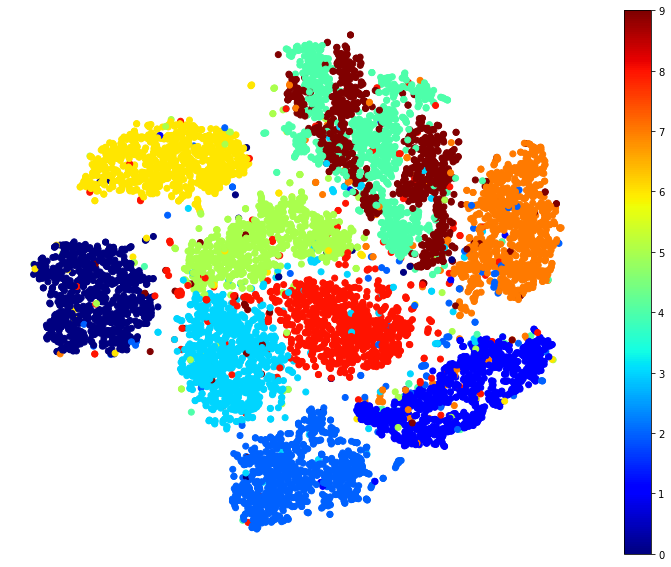

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap="jet")
plt.axis("off")
plt.colorbar()

plt.show()

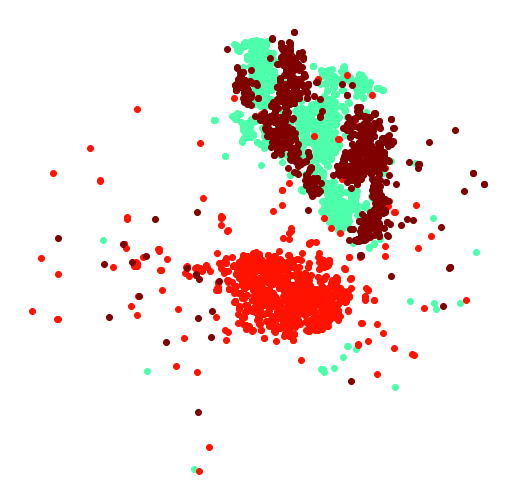

In [33]:
# 많이 겹쳐보이는 4와 8, 9에 집중
import matplotlib

plt.figure(figsize=(9, 9))
cmap = matplotlib.cm.get_cmap("jet")

for digit in (4, 8, 9):
    plt.scatter(X_reduced_tsne[y==digit, 0], X_reduced_tsne[y==digit, 1], c=cmap(digit/9))

plt.axis("off")
plt.show()

In [35]:
# 이 세 개의 숫자에 t-SNE를 실행시켜 더 나은 이미지를 만들 수 있는지 확인
idx = (y == 4) | (y == 8) | (y == 9)

X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced_tsne = tsne_subset.fit_transform(X_subset)

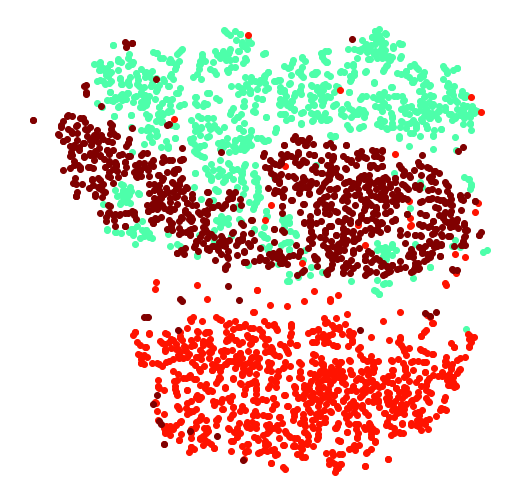

In [36]:
plt.figure(figsize=(9, 9))

for digit in (4, 8, 9):
    plt.scatter(X_subset_reduced_tsne[y_subset==digit, 0], X_subset_reduced_tsne[y_subset==digit, 1], c=cmap(digit/9))
    
plt.axis("off")
plt.show()

In [38]:
# 8이 구분 되어짐. 하지만 4와 9가 문제 -> 한 번더
idx = (y == 4) | (y == 9)

X_subset2 = X[idx]
y_subset2 = y[idx]

tsne_subset2 = TSNE(n_components=2, random_state=42)
X_subset_reduced_tsne2 = tsne_subset2.fit_transform(X_subset2)

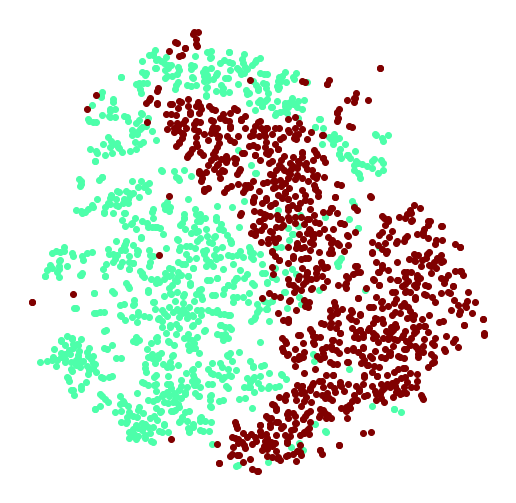

In [39]:
plt.figure(figsize=(9, 9))

for digit in (4, 9):
    plt.scatter(X_subset_reduced_tsne2[y_subset2==digit, 0], X_subset_reduced_tsne2[y_subset2==digit, 1], c=cmap(digit/9))
    
plt.axis("off")
plt.show()

In [40]:
# 군집이 덜 겹쳐졌음
# 각 군집에 숫자를 몇 개씩 나타내면 훨씬 이해하기 좋을 지

# 산점도와 색깔이 있는 숫자를 쓰기 위해 plot_digits() 함수
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1 사이로 만듭니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 그릴 숫자의 좌표 목록을 만듭니다.
    # 반복문 아래에서 `if` 문장을 쓰지 않기 위해 시작할 때 이미 그래프가 그려져 있다고 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 이해하기 쉽습니다.
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

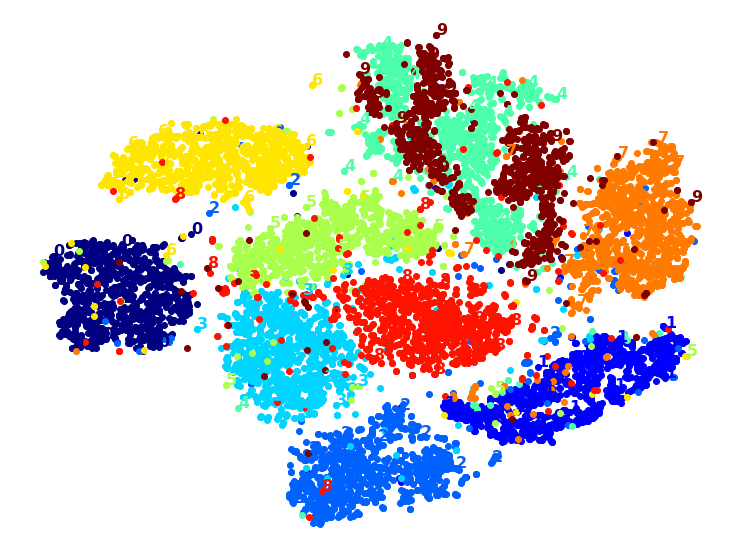

In [43]:
plot_digits(X_reduced_tsne, y)

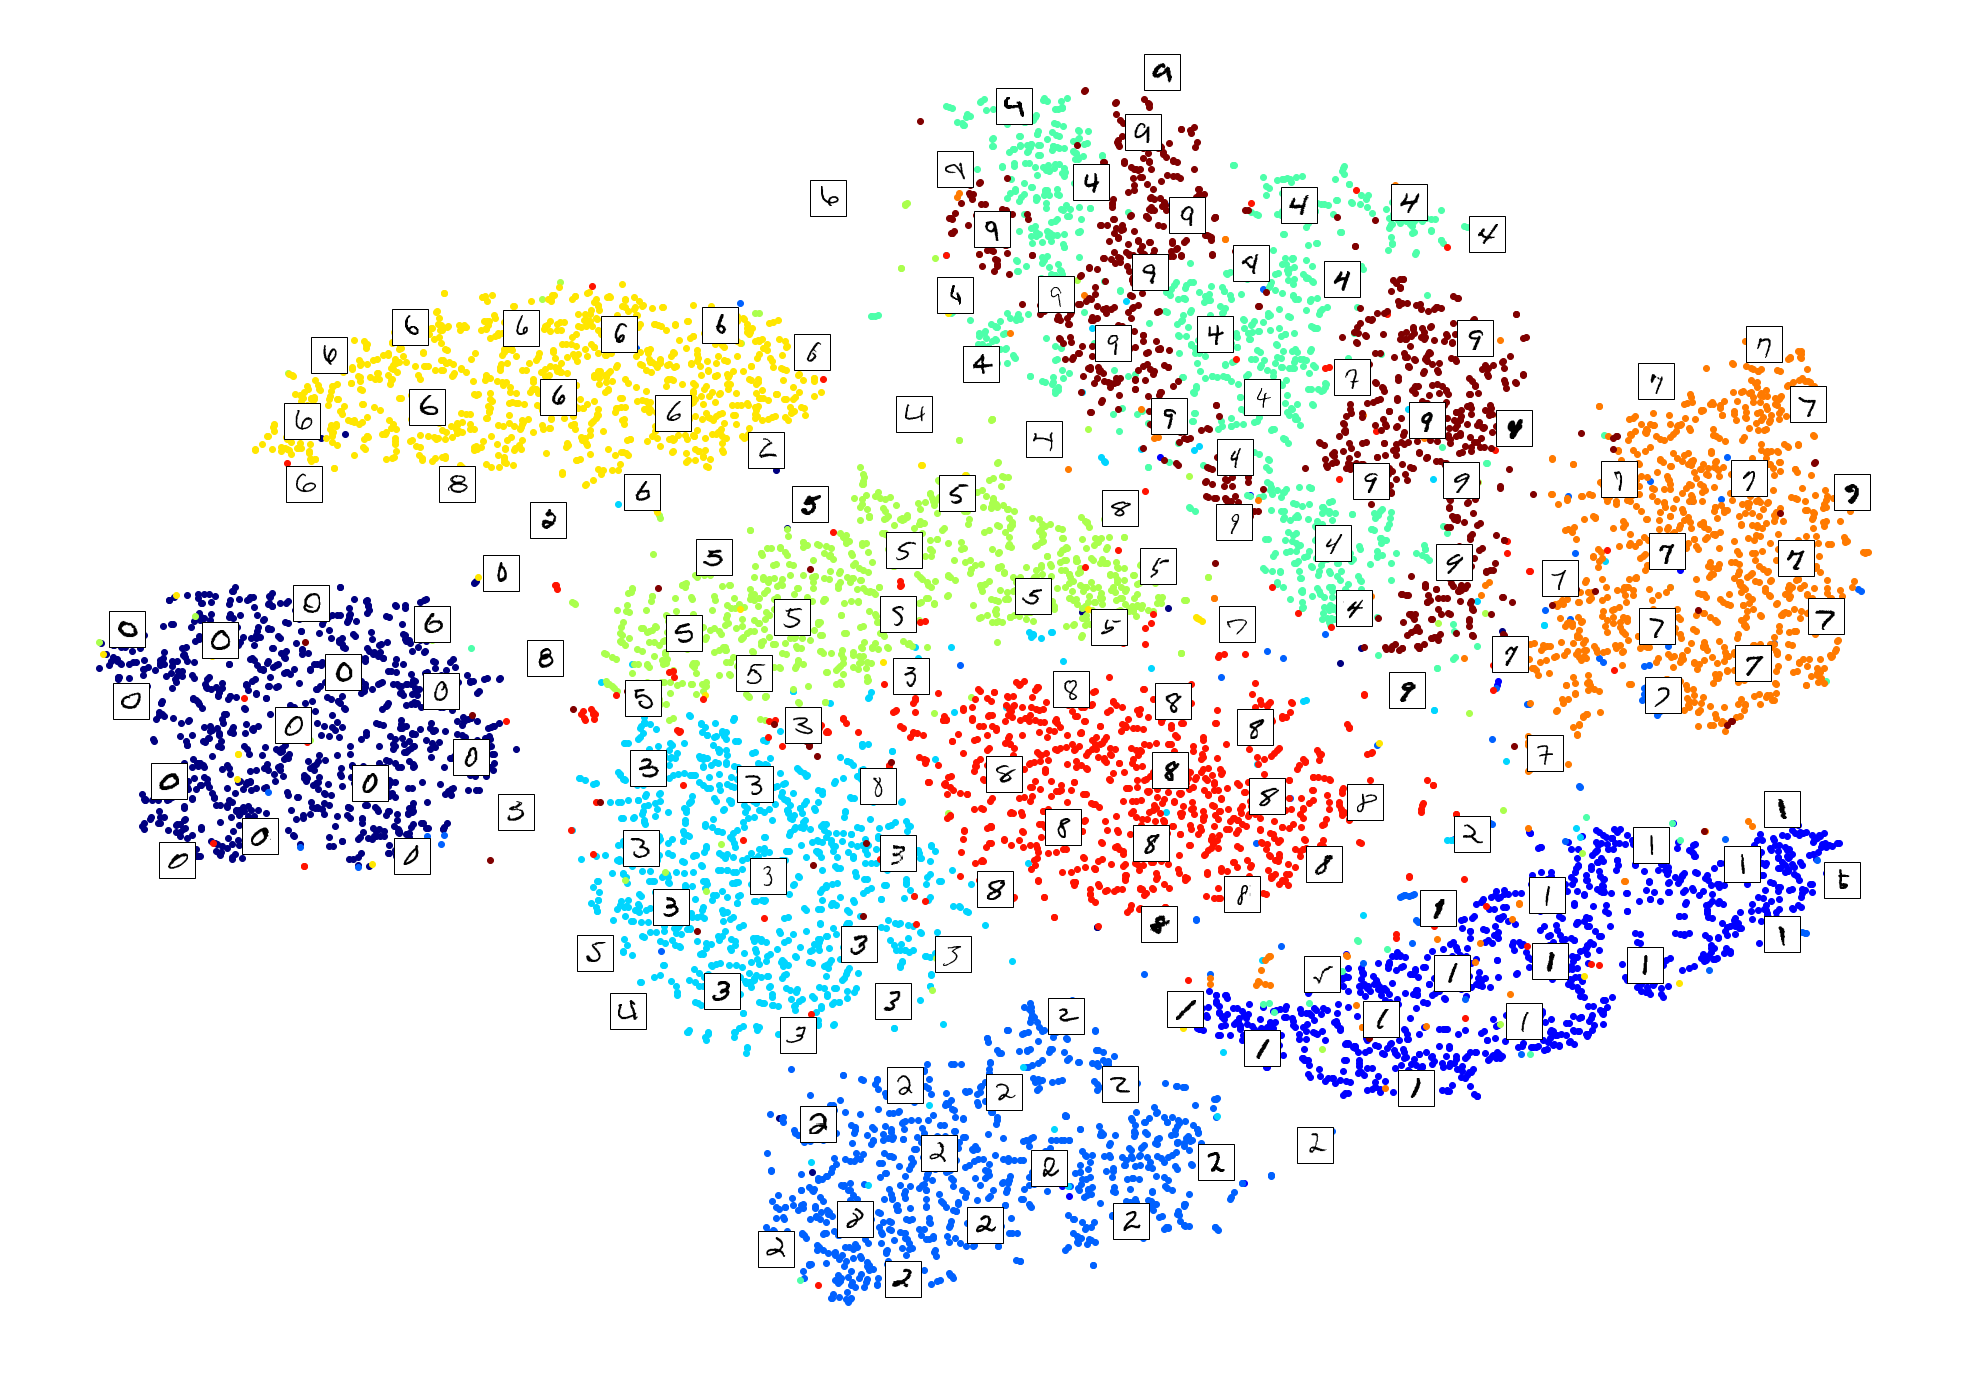

In [44]:
plot_digits(X_reduced_tsne, y, images=X, figsize=(35, 25))

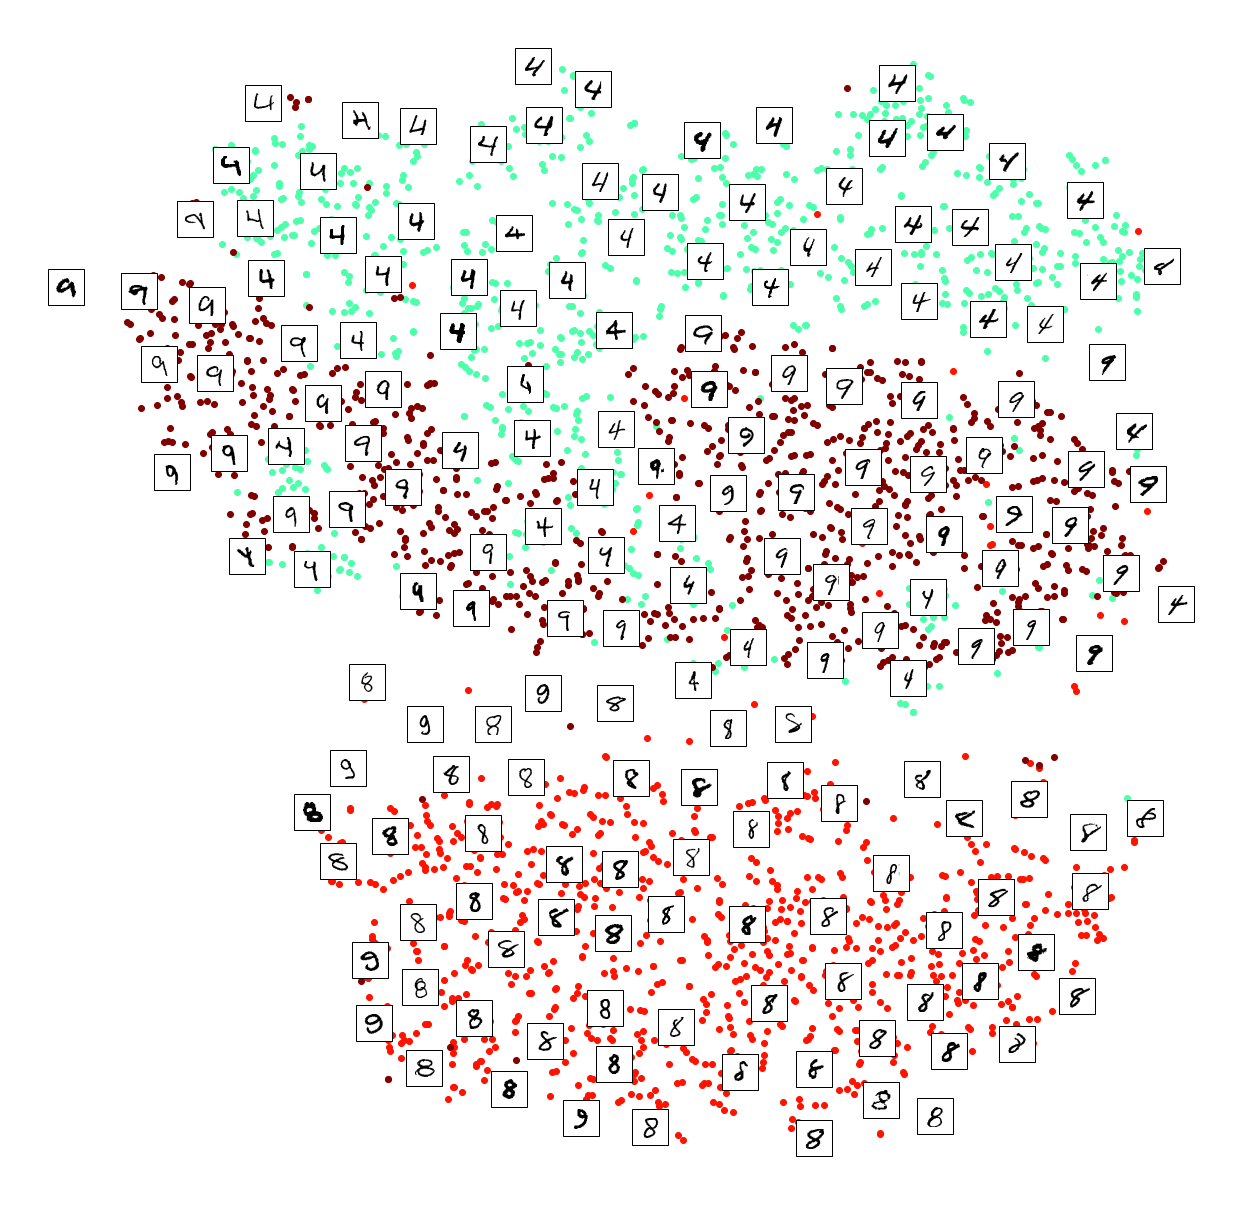

In [45]:
plot_digits(X_subset_reduced_tsne, y_subset, images=X_subset, figsize=(22, 22))

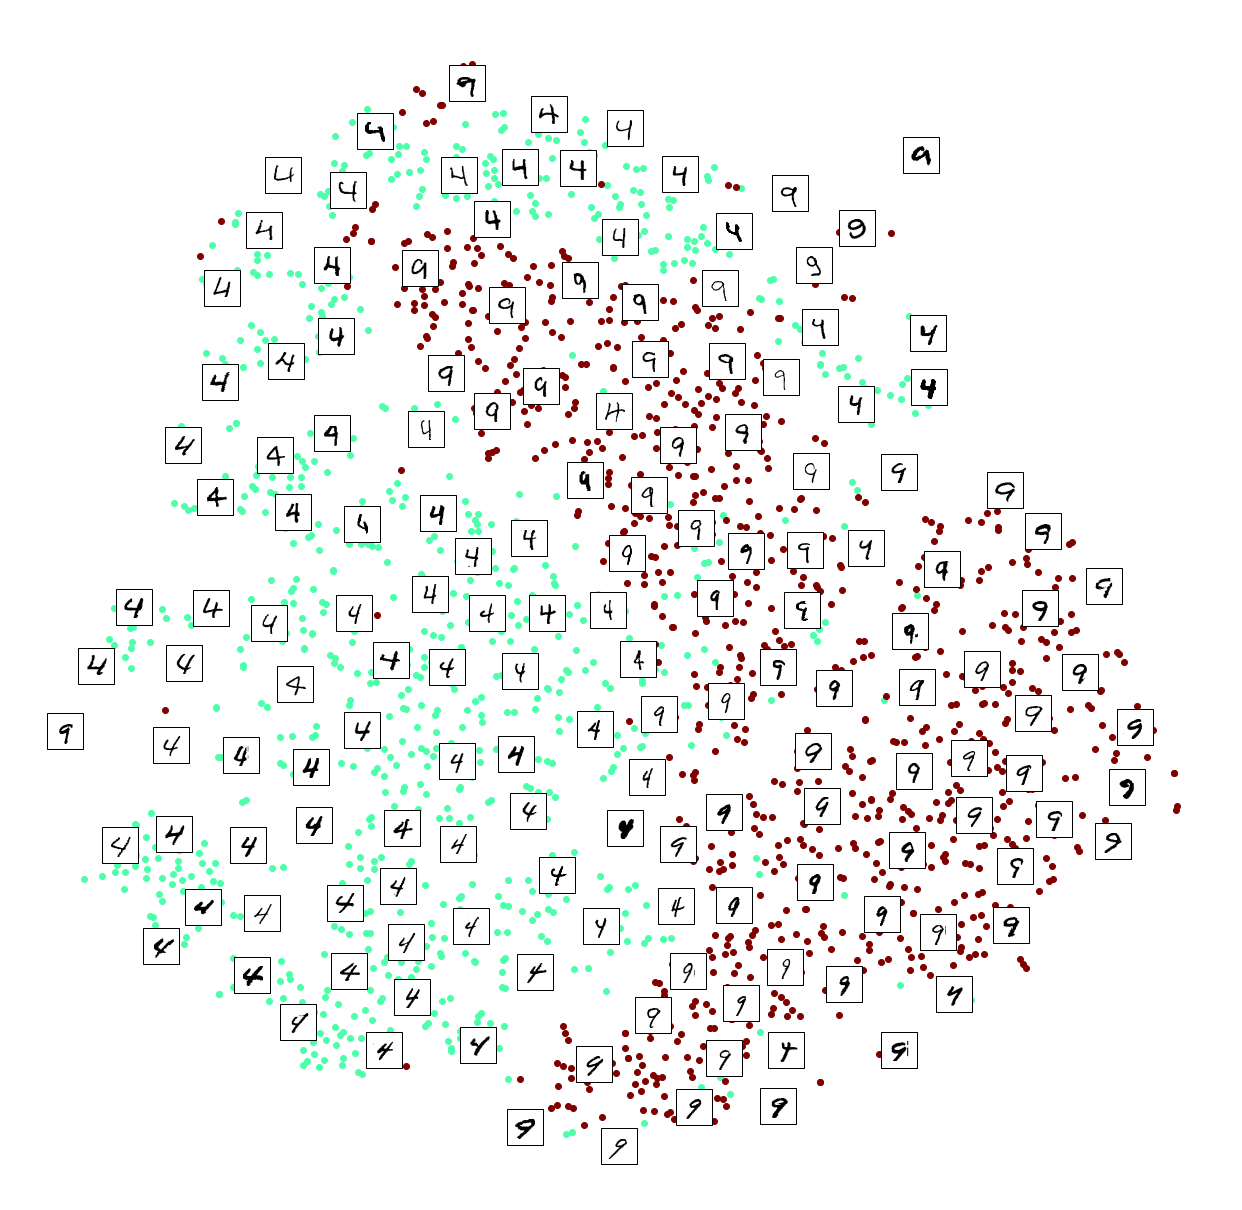

In [46]:
plot_digits(X_subset_reduced_tsne2, y_subset2, images=X_subset2, figsize=(22, 22))

PCA 시간: 0.4s


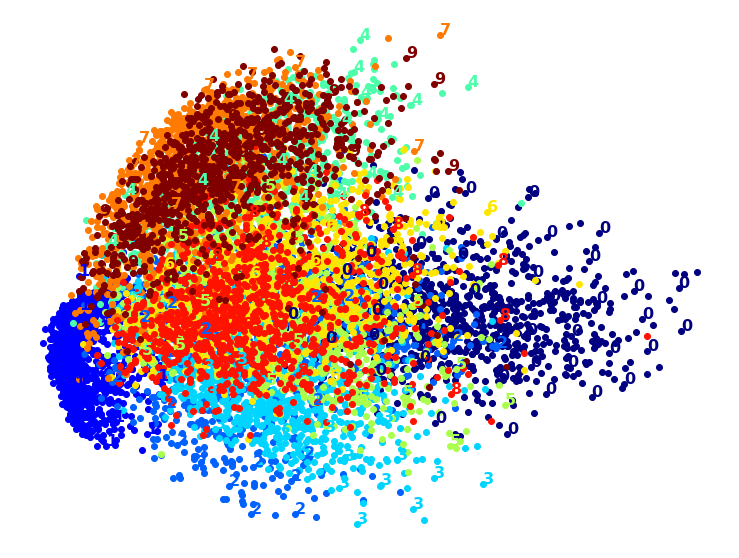

In [47]:
# PCA 차원 축소 알고리즘 적용하여 시각화 결과 비교
from sklearn.decomposition import PCA
import time

t0 = time.time()

X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)

t1 = time.time()

print("PCA 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_pca_reduced, y)
plt.show()

LLE 시간: 145.9s


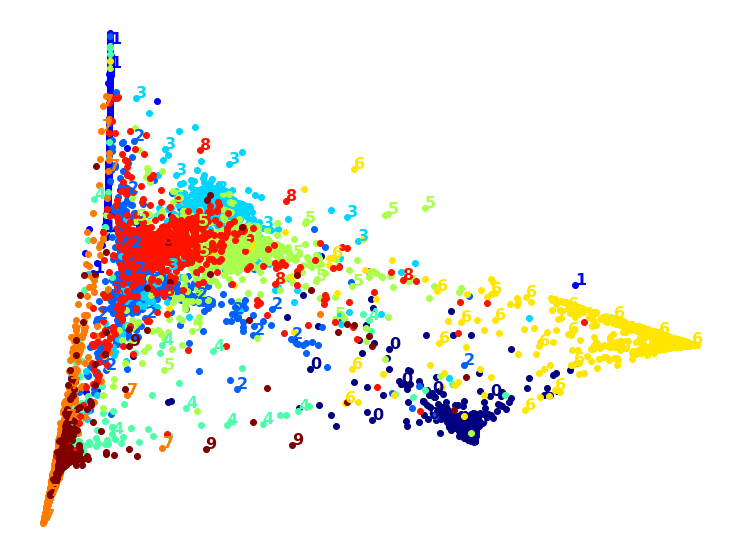

In [49]:
# LLE 차원 축소 알고리즘 적용하여 시각화 결과 비교

from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()

X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)

t1 = time.time()

print("LLE 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE 시간: 51.1s


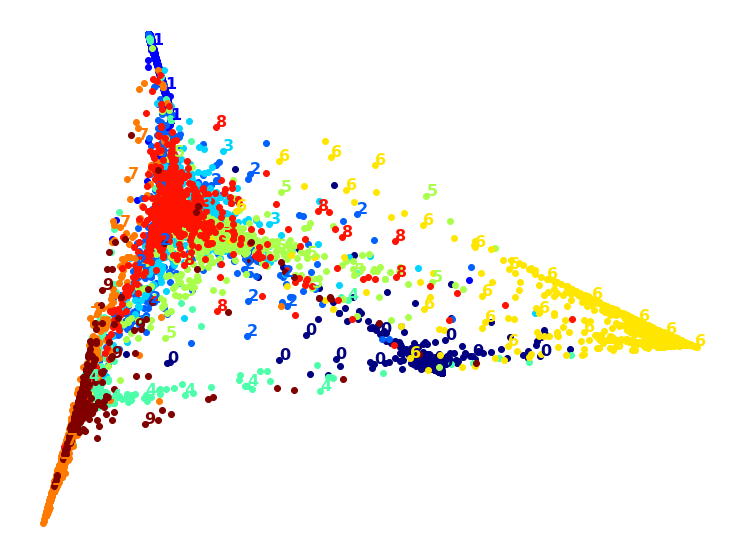

In [50]:
# 분산의 95%를 보존하도록 먼저 PCA를 적용하고 LLE 차원 축소 알고리즘 적용
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

t0 = time.time()

X_pca_lle_reduced = pca_lle.fit_transform(X)

t1 = time.time()

print("PCA+LLE 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_pca_lle_reduced, y)

plt.show()

MDS 시간: 229.3s (10,000개 이미지가 아닌 2,000개 이미지에서)


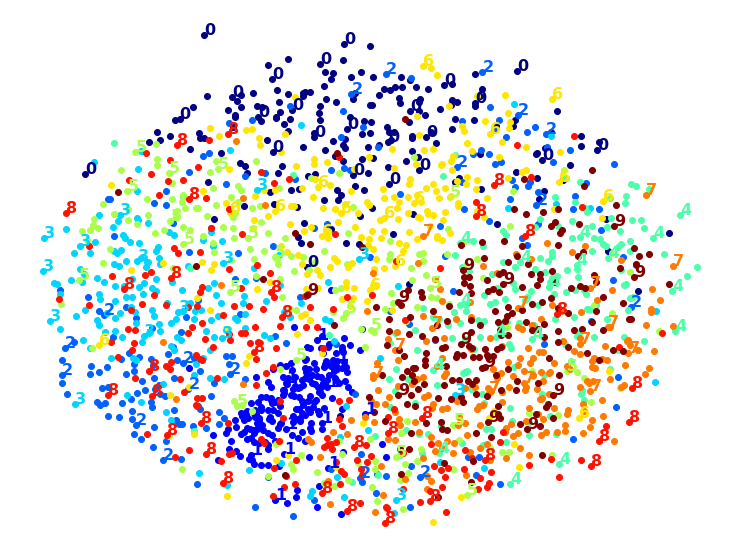

In [52]:
# MDS 차원 축소 알고리즘 적용하여 시각화 결과 비교
from sklearn.manifold import MDS

m = 2000

t0 = time.time()

X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])

t1 = time.time()

print("MDS 시간: {:.1f}s (10,000개 이미지가 아닌 2,000개 이미지에서)".format(t1 - t0))

plot_digits(X_mds_reduced, y[:m])

plt.show()

PCA+MDS 시간: 235.3s (10,000개 이미지가 아닌 2,000개 이미지에서)


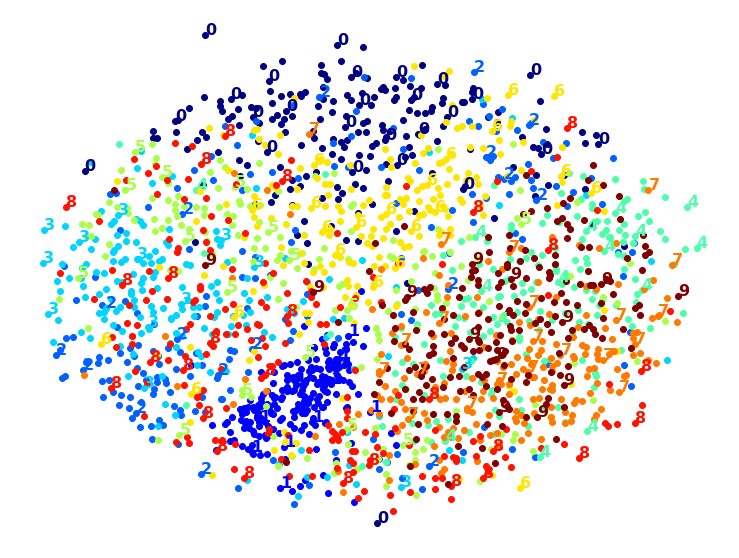

In [53]:
# 위의 MDS만 사용하면 너무 군집이 중복 -> PCA 선 처리 후 해보기
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])

t0 = time.time()

X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])

t1 = time.time()

print("PCA+MDS 시간: {:.1f}s (10,000개 이미지가 아닌 2,000개 이미지에서)".format(t1 - t0))

plot_digits(X_pca_mds_reduced, y[:m])

plt.show()

LDA 시간: 3.2s


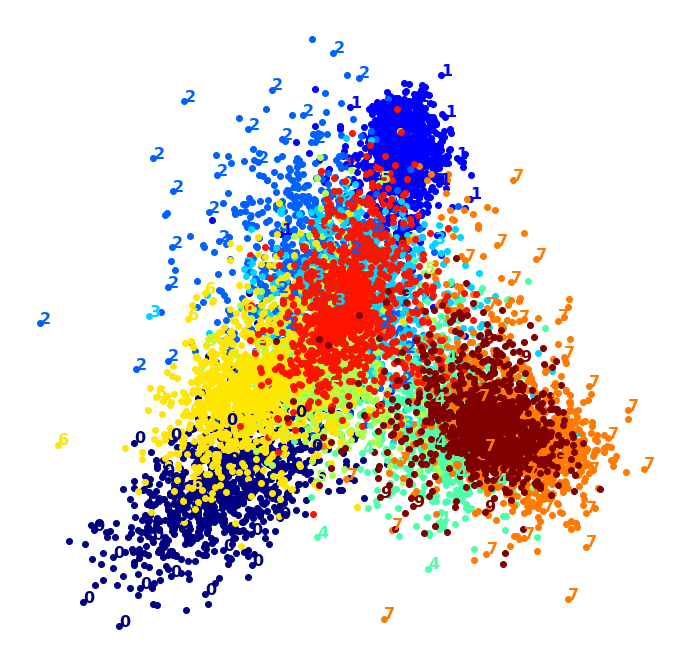

In [54]:
# PCA가 도움이 되지 않음
# LDA 차원 축소 알고리즘 적용하여 시각화 결과 비교

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()

X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

t1 = time.time()

print("LDA 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_lda_reduced, y, figsize=(12, 12))

plt.show()

t-SNE 시간: 220.2s


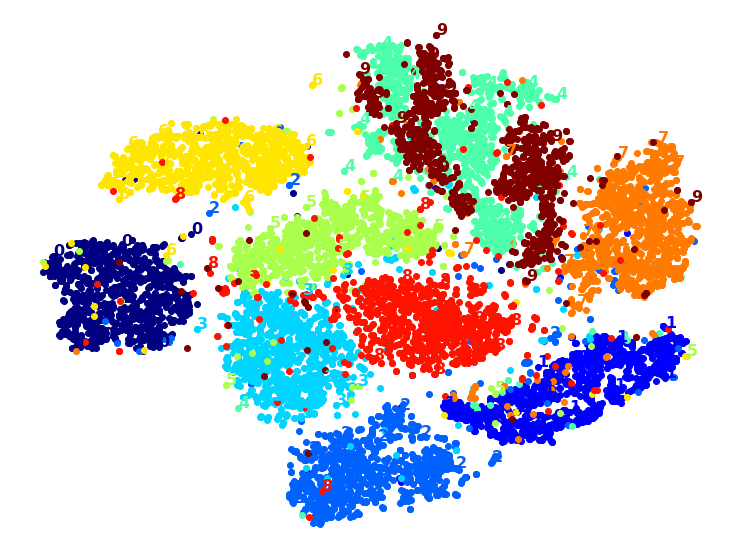

In [55]:
# 빠르지만 군집이 심각하게 중복
# 다시 한 번 t-SNE
from sklearn.manifold import TSNE

t0 = time.time()

X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)

t1 = time.time()

print("t-SNE 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_tsne_reduced, y)

plt.show()

PCA+t-SNE 시간: 119.6s


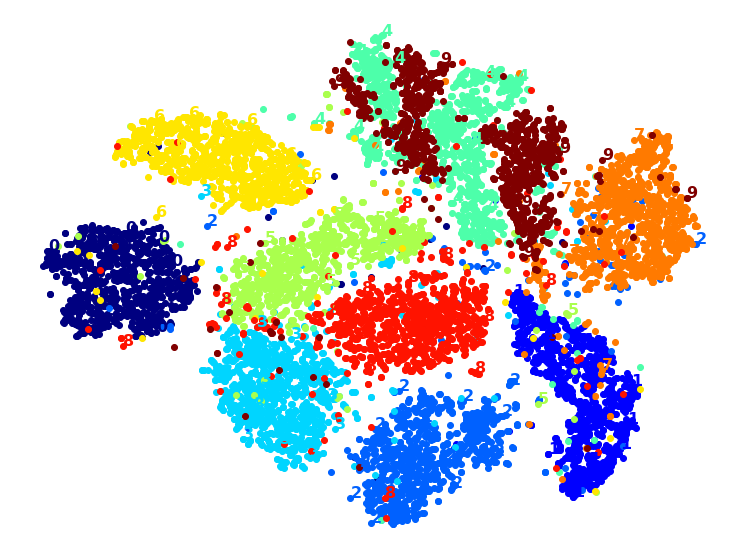

In [56]:
# LLE보다 속도가 너무 느림 -> PCA로 속도를 높여줄 수 있을까?
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

t0 = time.time()

X_pca_tsne_reduced = pca_tsne.fit_transform(X)

t1 = time.time()

print("PCA+t-SNE 시간: {:.1f}s".format(t1 - t0))

plot_digits(X_pca_tsne_reduced, y)

plt.show()